In [1]:
import numpy as np
import os
import torch
import torchvision
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import axes3d
from  PIL import Image
from time import time
from torch import nn
from torchvision import models
from torchvision import transforms
from torchvision import datasets
from torch.utils.data.dataset import Dataset
from torchsummary import summary
import pylab
import random
import numpy 
import pandas as pd

from sklearn.decomposition import PCA
from sklearn import preprocessing

torch.cuda.is_available()

True

In [2]:
resnet18 = models.resnet18(pretrained=True)

In [3]:
resnet34 = models.resnet34(pretrained=True)

In [4]:
resnet50 = models.resnet50(pretrained=True)

In [5]:
resnet101 = models.resnet101(pretrained=True)

In [6]:
resnet152 = models.resnet152(pretrained=True)

In [7]:
# choose the model.
resnet = resnet50

In [8]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], 
            std=[0.229, 0.224, 0.225]
        )])

In [9]:
def load_images_from_folder(folder, end, as_tensor = False):

    images = []
    files = folders = 0
    count= 0
    dirnames = [] 

    num_img = []

    for _, dirnames, filenames in os.walk(folder):

 

        if dirnames != []:
            subfolders = dirnames
        current_path = os.path.join(folder, subfolders[count])
        num_img.append(len(os.listdir(current_path)))
        for filename in os.listdir(current_path):
            img = Image.open(os.path.join(current_path, filename))
            if img is not None:
                if as_tensor:
                    img = torch.from_numpy(img * 1.0)
                    images.append(img)
                else: 
                    images.append(img)

 

        count += 1
        
        if count % 10 == 0:
            print('number of folder done =', count, 'total number of images so far =', len(images))
            
        if count  == end:
            return images, num_img

    return images, num_img


def show_image(PIL_img):
    PIL_img.show()

In [10]:
path = r'C:\Users\richa\Desktop\projects\Bristol uni porjects\Univecity projects\Applied Data Science\uob_image_set'

dataset, num_img_list = load_images_from_folder(path, 10)

number of folder done = 10 total number of images so far = 42


In [11]:
print(len(dataset)), print(num_img_list), print(sum(num_img_list))

42
[5, 4, 4, 5, 4, 3, 4, 4, 5, 4]
42


(None, None, None)

In [12]:
list_input_tensor = []
list_input_batch = []
num_img = sum(num_img_list)
for item in range(num_img):
    input_tensor = preprocess(dataset[item])
    input_batch = input_tensor.unsqueeze(0)
    list_input_tensor.append(input_tensor)
    list_input_batch.append(input_batch)
    

In [13]:
for param in resnet.parameters():
    param.requires_grad = False
    
# Parameters of newly constructed modules have requires_grad=True by default
# num_ftrs = resnet.fc.in_features
# resnet.fc = torch.nn.Linear(num_ftrs, 3)


In [14]:
for i in range(len(list_input_batch)):
    if torch.cuda.is_available():
        input_batch = list_input_batch[i].to('cuda')
        resnet.to('cuda')
    
    with torch.no_grad():
        output = resnet(input_batch)
    print(output)

tensor([[-1.0991e+00, -1.4030e-01, -6.0586e-01, -1.1079e+00, -6.3231e-01,
         -1.1121e-01, -6.5932e-01,  4.3051e-01,  1.4164e-01, -5.7551e-01,
         -8.3477e-01, -8.5572e-01, -3.3686e-01, -1.0233e+00, -8.1417e-01,
         -5.0069e-01, -6.3349e-01, -2.0317e-01, -1.7950e-01, -5.7842e-01,
         -1.1298e+00, -7.4287e-01, -1.3064e+00, -1.7231e-01, -8.8681e-01,
         -8.0577e-01, -8.5428e-01, -6.6748e-01, -6.3107e-01, -5.6145e-01,
         -6.8148e-01, -7.6360e-01, -5.8070e-01, -4.7019e-01, -2.0017e-01,
         -5.5671e-01,  7.1980e-01, -6.4222e-01, -3.9282e-01,  6.7851e-02,
         -6.1719e-01, -7.1710e-01, -6.8266e-01, -3.0853e-01, -2.5926e-01,
         -3.1934e-01, -5.2058e-01, -4.6265e-01, -1.2299e+00, -7.4322e-01,
         -2.4493e-01,  4.1729e-01, -3.5642e-01, -3.9773e-01, -2.9216e-01,
         -9.3219e-01, -4.6438e-01, -1.1015e+00, -2.8442e-01, -1.9036e-02,
          7.0979e-01,  9.1666e-02, -1.0826e-01,  7.4833e-02, -6.1456e-01,
         -2.7867e-01, -4.0455e-01, -2.

tensor([[-1.1232e+00, -3.6353e-01, -6.6738e-01, -1.1899e+00, -7.6622e-01,
         -4.0224e-01, -9.5097e-01,  4.6642e-01,  1.1103e-01, -7.3281e-01,
         -8.4334e-01, -8.7476e-01, -4.4059e-01, -1.0054e+00, -8.6691e-01,
         -5.1461e-01, -7.5506e-01, -1.9299e-01, -2.3245e-01, -5.8450e-01,
         -1.3096e+00, -8.5526e-01, -1.4115e+00, -2.5513e-01, -1.1053e+00,
         -6.8348e-01, -8.8055e-01, -6.6632e-01, -5.5685e-01, -6.2007e-01,
         -8.5452e-01, -8.3028e-01, -6.8453e-01, -7.1288e-01, -3.4513e-01,
         -6.9453e-01,  4.3652e-01, -6.6527e-01, -3.9495e-01,  4.3142e-02,
         -7.2654e-01, -7.9029e-01, -7.6541e-01, -3.9122e-01, -2.7630e-01,
         -3.0258e-01, -5.6941e-01, -5.5405e-01, -1.2440e+00, -8.9682e-01,
         -4.7317e-01,  3.1320e-01, -4.2476e-01, -5.1226e-01, -3.4887e-01,
         -1.0097e+00, -4.7810e-01, -1.1733e+00, -4.2454e-01, -1.3546e-01,
          6.1876e-01, -7.8553e-03, -1.4545e-01, -8.4001e-02, -7.1743e-01,
         -2.7767e-01, -5.1532e-01, -4.

tensor([[-1.1341e+00, -3.4090e-01, -7.1205e-01, -1.1667e+00, -6.5655e-01,
         -4.5507e-01, -8.8221e-01,  3.6407e-01, -5.8161e-03, -8.2699e-01,
         -8.0186e-01, -7.8801e-01, -4.5911e-01, -1.0288e+00, -9.0187e-01,
         -5.7879e-01, -7.6242e-01, -2.4680e-01, -1.9822e-01, -5.6157e-01,
         -1.3204e+00, -8.7160e-01, -1.3620e+00, -3.6077e-01, -9.8373e-01,
         -6.4457e-01, -8.4651e-01, -7.2525e-01, -5.7133e-01, -5.3359e-01,
         -7.2824e-01, -7.4188e-01, -5.5127e-01, -5.6871e-01, -2.4394e-01,
         -6.2411e-01,  6.1194e-01, -5.8055e-01, -3.2521e-01,  6.8127e-02,
         -6.2517e-01, -6.8470e-01, -6.9593e-01, -2.5097e-01, -1.8690e-01,
         -2.7053e-01, -5.5307e-01, -4.5433e-01, -1.1928e+00, -8.3799e-01,
         -3.9806e-01,  3.1278e-01, -4.6384e-01, -3.5993e-01, -2.5237e-01,
         -1.0612e+00, -4.8697e-01, -1.1145e+00, -3.6480e-01, -1.0676e-01,
          6.3533e-01, -4.7934e-02, -9.9395e-02, -1.1515e-02, -7.1507e-01,
         -2.6939e-01, -4.1177e-01, -3.

tensor([[-1.1718e+00, -3.0849e-01, -6.0650e-01, -1.1484e+00, -6.2065e-01,
         -4.3287e-01, -9.5455e-01,  4.6314e-01,  1.2775e-01, -7.7506e-01,
         -7.4068e-01, -7.4135e-01, -3.6282e-01, -9.0577e-01, -8.9679e-01,
         -5.2554e-01, -5.9414e-01, -1.8266e-01, -6.9532e-02, -4.8713e-01,
         -1.2170e+00, -8.3361e-01, -1.2557e+00, -2.8385e-01, -9.5595e-01,
         -7.4179e-01, -9.6541e-01, -7.3577e-01, -5.7034e-01, -5.7785e-01,
         -8.3638e-01, -7.5231e-01, -6.6166e-01, -5.2870e-01, -2.8828e-01,
         -6.3555e-01,  4.8709e-01, -5.5965e-01, -3.6115e-01, -1.4051e-02,
         -5.8644e-01, -7.6478e-01, -8.6209e-01, -3.9213e-01, -2.7663e-01,
         -2.9160e-01, -5.0270e-01, -4.9271e-01, -1.2046e+00, -8.6880e-01,
         -4.7993e-01,  3.4046e-01, -4.7842e-01, -4.2002e-01, -2.3087e-01,
         -9.8920e-01, -3.4196e-01, -1.1144e+00, -4.1962e-01, -4.8756e-02,
          6.9971e-01,  5.0464e-02, -9.3504e-02, -5.5627e-02, -6.5253e-01,
         -3.1194e-01, -4.7653e-01, -2.

tensor([[-9.1052e-01, -2.4306e-01, -6.0615e-01, -1.1572e+00, -6.5689e-01,
         -2.6439e-01, -9.2221e-01,  3.6262e-01,  1.6219e-01, -6.7784e-01,
         -9.4186e-01, -9.0886e-01, -5.3025e-01, -9.9981e-01, -8.9515e-01,
         -5.5936e-01, -6.5318e-01, -1.3572e-01, -1.4543e-01, -5.2323e-01,
         -1.1571e+00, -7.8616e-01, -1.2643e+00, -2.2929e-01, -9.7563e-01,
         -7.2821e-01, -8.5886e-01, -6.1287e-01, -5.5254e-01, -5.6582e-01,
         -7.8492e-01, -8.9735e-01, -6.7867e-01, -3.7367e-01, -5.1159e-02,
         -5.6024e-01,  7.6159e-01, -5.3852e-01, -3.6576e-01,  1.3081e-01,
         -6.5542e-01, -7.6991e-01, -6.7205e-01, -3.1268e-01, -2.3791e-01,
         -2.3015e-01, -5.8553e-01, -4.4073e-01, -1.1132e+00, -7.2402e-01,
         -2.8427e-01,  3.2420e-01, -2.5864e-01, -2.8469e-01, -1.0381e-01,
         -8.7539e-01, -4.3211e-01, -8.9176e-01, -1.5463e-01, -1.3016e-02,
          6.9604e-01,  1.4302e-01, -1.5128e-02,  6.9596e-02, -5.5947e-01,
         -1.7504e-01, -3.1911e-01, -1.

tensor([[-9.5602e-01, -1.8470e-01, -6.3371e-01, -1.1893e+00, -6.9075e-01,
         -1.6620e-01, -7.8414e-01,  2.8774e-01,  8.2224e-03, -7.8990e-01,
         -9.3103e-01, -8.6066e-01, -3.6473e-01, -1.0259e+00, -8.6691e-01,
         -5.3842e-01, -7.2680e-01, -3.1430e-01, -2.3701e-01, -5.1804e-01,
         -1.3375e+00, -7.8263e-01, -1.4310e+00, -2.7486e-01, -9.5833e-01,
         -6.0421e-01, -8.3058e-01, -6.1647e-01, -4.7256e-01, -5.5738e-01,
         -7.5394e-01, -9.0899e-01, -7.5133e-01, -6.8280e-01, -2.3125e-01,
         -4.6997e-01,  5.4786e-01, -6.3152e-01, -4.8525e-01, -8.1459e-02,
         -7.4495e-01, -7.8833e-01, -8.0192e-01, -4.1653e-01, -2.5637e-01,
         -4.0162e-01, -6.5301e-01, -5.9054e-01, -1.2660e+00, -9.4460e-01,
         -4.1968e-01,  4.2062e-01, -2.6539e-01, -2.0236e-01, -2.7670e-01,
         -1.0067e+00, -4.3299e-01, -9.8438e-01, -2.4381e-01, -4.1115e-04,
          6.6967e-01, -1.9673e-02, -1.7846e-01, -2.7372e-02, -6.2841e-01,
         -2.8115e-01, -4.1429e-01, -3.

tensor([[-1.0643e+00, -2.3704e-01, -7.3125e-01, -1.2795e+00, -7.3970e-01,
         -3.7139e-01, -9.4380e-01,  3.5496e-01,  7.3678e-02, -7.2660e-01,
         -7.6957e-01, -5.5130e-01, -2.1823e-01, -7.3144e-01, -6.8064e-01,
         -4.5619e-01, -4.5989e-01, -7.1015e-02, -8.1450e-02, -2.7558e-01,
         -1.1787e+00, -6.9087e-01, -1.3384e+00, -1.7934e-01, -9.5472e-01,
         -6.9231e-01, -9.0713e-01, -6.8715e-01, -5.8335e-01, -5.5644e-01,
         -8.8002e-01, -8.3302e-01, -7.4189e-01, -6.6338e-01, -3.1695e-01,
         -6.1040e-01,  4.7324e-01, -6.0598e-01, -4.6998e-01, -4.9004e-02,
         -7.2522e-01, -7.3116e-01, -7.1959e-01, -4.2874e-01, -3.9780e-01,
         -4.1103e-01, -6.2051e-01, -6.2006e-01, -1.2371e+00, -1.0062e+00,
         -6.1004e-01,  2.4962e-01, -2.6570e-01, -3.1042e-01, -3.8712e-01,
         -9.8649e-01, -4.6676e-01, -1.0512e+00, -4.1523e-01, -4.1810e-02,
          6.5669e-01, -9.0273e-02, -2.3032e-01, -8.1096e-02, -7.1471e-01,
         -4.9370e-01, -4.4007e-01, -3.

tensor([[-1.0311e+00, -3.2519e-01, -5.5979e-01, -1.0652e+00, -5.9419e-01,
         -1.7803e-01, -7.0947e-01,  3.0742e-01,  8.0045e-02, -9.0705e-01,
         -8.5357e-01, -8.3645e-01, -4.0551e-01, -8.5293e-01, -1.0098e+00,
         -5.7394e-01, -6.1433e-01, -1.9716e-01, -2.0301e-01, -5.4190e-01,
         -1.2435e+00, -8.6489e-01, -1.4220e+00, -2.5027e-01, -9.8505e-01,
         -7.1285e-01, -8.0804e-01, -6.7299e-01, -4.8819e-01, -5.3376e-01,
         -8.3949e-01, -8.5341e-01, -6.9588e-01, -6.0081e-01, -1.6626e-01,
         -4.6298e-01,  6.0837e-01, -5.9141e-01, -4.2285e-01, -2.7447e-02,
         -6.8445e-01, -7.8811e-01, -8.0089e-01, -4.2020e-01, -3.2294e-01,
         -3.4615e-01, -5.7275e-01, -4.7775e-01, -1.2627e+00, -9.9102e-01,
         -4.9249e-01,  3.5808e-01, -2.7513e-01, -2.3757e-01, -2.6448e-01,
         -9.7108e-01, -3.5475e-01, -9.8358e-01, -2.9569e-01, -4.4235e-02,
          6.9203e-01, -4.7512e-02, -1.2211e-01, -6.7421e-02, -6.8002e-01,
         -1.9155e-01, -4.3544e-01, -4.

tensor([[-9.3842e-01, -3.4406e-01, -6.1169e-01, -1.1636e+00, -5.8900e-01,
         -2.9892e-01, -7.3173e-01,  2.6923e-01,  9.5757e-02, -6.6276e-01,
         -7.5458e-01, -7.9151e-01, -2.7458e-01, -7.8152e-01, -6.8178e-01,
         -3.3168e-01, -6.3145e-01, -1.0481e-01, -7.5814e-02, -3.8908e-01,
         -1.1057e+00, -8.0978e-01, -1.1484e+00, -1.5593e-01, -9.7258e-01,
         -5.6538e-01, -7.2736e-01, -4.9858e-01, -3.3081e-01, -5.4741e-01,
         -4.9626e-01, -7.4666e-01, -4.8543e-01, -5.4876e-01, -2.5250e-01,
         -4.3491e-01,  6.5815e-01, -4.7705e-01, -3.9802e-01,  6.4136e-02,
         -5.4313e-01, -6.3425e-01, -6.5813e-01, -3.8358e-01, -1.1363e-01,
         -2.4167e-01, -4.3345e-01, -6.1310e-01, -1.1907e+00, -6.6897e-01,
         -2.1373e-01,  3.4419e-01, -1.9291e-01, -1.1494e-01, -1.5420e-01,
         -7.7275e-01, -3.1799e-01, -7.7723e-01, -1.1431e-02,  3.5832e-02,
          8.4386e-01,  1.5302e-01,  1.0500e-04,  7.3403e-02, -4.8897e-01,
         -1.3112e-01, -2.8660e-01, -1.

tensor([[-8.3286e-01, -3.0031e-01, -5.5941e-01, -1.1258e+00, -5.6671e-01,
         -2.0309e-01, -6.9006e-01,  3.5684e-01,  1.3364e-01, -7.2693e-01,
         -6.9623e-01, -7.9253e-01, -2.9958e-01, -7.9130e-01, -7.9963e-01,
         -3.9667e-01, -5.5419e-01, -1.1885e-01,  1.7297e-02, -4.6564e-01,
         -1.1338e+00, -7.4920e-01, -1.1268e+00, -5.5363e-02, -9.4320e-01,
         -6.2736e-01, -7.9022e-01, -6.8312e-01, -4.0634e-01, -4.2455e-01,
         -5.9660e-01, -8.1151e-01, -5.3643e-01, -4.7454e-01, -1.0967e-01,
         -4.4400e-01,  6.9601e-01, -3.8842e-01, -3.4242e-01,  2.2207e-01,
         -5.3442e-01, -5.2324e-01, -6.8635e-01, -2.7444e-01, -1.0954e-01,
         -9.6754e-02, -4.0278e-01, -3.7351e-01, -1.1214e+00, -6.4140e-01,
         -1.8057e-01,  4.6587e-01, -3.3663e-01, -2.6764e-01, -2.5166e-01,
         -8.7391e-01, -4.1600e-01, -9.4683e-01, -1.0134e-01,  2.6550e-02,
          8.1983e-01,  3.9967e-02,  2.6631e-02,  1.3662e-02, -4.5924e-01,
         -1.7102e-01, -3.6852e-01, -1.

tensor([[-9.8045e-01, -2.8764e-01, -7.6172e-01, -1.2342e+00, -7.0364e-01,
         -2.7104e-01, -7.6582e-01,  3.7836e-01,  5.1728e-02, -6.7254e-01,
         -6.6277e-01, -8.1101e-01, -2.8116e-01, -8.3988e-01, -7.5507e-01,
         -4.1077e-01, -6.3168e-01, -2.3095e-01, -1.3795e-01, -4.7718e-01,
         -1.1585e+00, -7.3515e-01, -1.3330e+00, -1.8241e-01, -9.8253e-01,
         -5.8864e-01, -8.7207e-01, -6.6994e-01, -4.3857e-01, -5.5737e-01,
         -6.0095e-01, -7.7042e-01, -4.7902e-01, -5.1273e-01, -1.3415e-01,
         -4.4236e-01,  8.0627e-01, -4.6544e-01, -3.1689e-01,  1.8338e-01,
         -5.0197e-01, -5.5008e-01, -7.0730e-01, -2.8486e-01, -1.4447e-01,
         -1.0508e-01, -4.5804e-01, -3.6713e-01, -1.1427e+00, -5.9163e-01,
         -3.0596e-01,  4.3339e-01, -3.7979e-01, -3.5902e-01, -3.0385e-01,
         -8.9033e-01, -4.2460e-01, -1.0009e+00, -2.1514e-01,  1.5900e-02,
          7.2546e-01,  7.3435e-02,  2.3958e-02,  1.9039e-02, -5.0388e-01,
         -3.3609e-01, -3.5244e-01, -3.

tensor([[-1.0531e+00, -4.4745e-01, -6.8249e-01, -1.3469e+00, -8.6341e-01,
         -3.1632e-01, -9.0296e-01,  3.7383e-01,  9.5272e-02, -8.1169e-01,
         -8.3624e-01, -8.5060e-01, -4.4961e-01, -9.4989e-01, -9.3737e-01,
         -5.5973e-01, -7.8766e-01, -1.8608e-01, -1.5007e-01, -5.2246e-01,
         -1.2978e+00, -8.3881e-01, -1.4192e+00, -2.2557e-01, -1.0599e+00,
         -7.3060e-01, -9.9705e-01, -7.5561e-01, -6.4510e-01, -6.6357e-01,
         -8.7262e-01, -9.7431e-01, -8.0684e-01, -5.9751e-01, -2.7755e-01,
         -5.8756e-01,  6.0413e-01, -5.6994e-01, -4.7314e-01,  3.2242e-02,
         -7.9961e-01, -8.0859e-01, -8.6484e-01, -4.3634e-01, -3.6400e-01,
         -2.6081e-01, -6.4859e-01, -5.8124e-01, -1.2863e+00, -8.4952e-01,
         -3.9920e-01,  3.2095e-01, -4.2422e-01, -3.7543e-01, -3.5226e-01,
         -1.0966e+00, -4.6786e-01, -1.1071e+00, -3.5861e-01, -1.7940e-01,
          5.9899e-01, -7.9535e-02, -2.8155e-01, -2.0271e-02, -7.4700e-01,
         -3.7377e-01, -4.2316e-01, -3.

tensor([[-1.0430e+00, -2.9225e-01, -5.7381e-01, -1.1881e+00, -6.5376e-01,
         -2.1360e-01, -8.8223e-01,  3.5953e-01,  1.3307e-01, -7.1993e-01,
         -8.1015e-01, -8.3281e-01, -4.1775e-01, -9.1559e-01, -9.0697e-01,
         -4.9189e-01, -6.2303e-01, -1.2303e-01, -1.3415e-01, -4.6789e-01,
         -1.1796e+00, -6.4257e-01, -1.2495e+00, -2.2637e-01, -1.0035e+00,
         -7.5195e-01, -8.8212e-01, -6.6566e-01, -5.1738e-01, -4.3774e-01,
         -8.2810e-01, -9.3874e-01, -7.5032e-01, -4.7223e-01, -2.3536e-01,
         -6.6542e-01,  4.9156e-01, -6.6127e-01, -3.9913e-01,  1.8689e-02,
         -6.1860e-01, -8.1568e-01, -8.3631e-01, -3.7456e-01, -3.1069e-01,
         -2.9332e-01, -6.1420e-01, -4.9179e-01, -1.2828e+00, -8.5938e-01,
         -4.3241e-01,  4.2214e-01, -3.9512e-01, -4.2415e-01, -3.2518e-01,
         -1.0161e+00, -5.2176e-01, -1.1227e+00, -3.2123e-01, -7.3382e-02,
          6.5380e-01, -1.1924e-01, -2.1949e-01, -9.5711e-02, -6.5289e-01,
         -3.1290e-01, -4.0945e-01, -3.

tensor([[-1.1308, -0.3118, -0.5076, -1.1233, -0.6158, -0.3695, -0.8830,  0.3374,
          0.1722, -0.7511, -0.7511, -0.7752, -0.2526, -0.8169, -0.8525, -0.4928,
         -0.6360, -0.1776, -0.1183, -0.5075, -1.1963, -0.6186, -1.2122, -0.2029,
         -0.9366, -0.7882, -0.9062, -0.7372, -0.6191, -0.5386, -0.6895, -0.7654,
         -0.6518, -0.3969, -0.1748, -0.4728,  0.5795, -0.5370, -0.3779,  0.2457,
         -0.5158, -0.6693, -0.6991, -0.2520, -0.2049, -0.2716, -0.4578, -0.4507,
         -1.0032, -0.8707, -0.4176,  0.4609, -0.4267, -0.3129, -0.2148, -0.9788,
         -0.5157, -1.0595, -0.3121, -0.0624,  0.5998,  0.0049, -0.1647, -0.0659,
         -0.6367, -0.2657, -0.4484, -0.2396, -0.7902, -0.5647, -1.1862,  0.2181,
         -1.2512, -0.3991, -0.7604, -0.7349, -0.0080, -0.2596,  0.4700,  0.1486,
         -0.8518, -1.5159,  0.1666, -0.6550, -0.7987, -0.1860,  0.2045,  0.3044,
         -0.0183, -0.5171, -0.6627, -1.0397, -1.3809, -0.2943,  0.0092, -1.5239,
         -0.4223, -0.5461, -

tensor([[-1.0652e+00, -2.4501e-01, -6.1160e-01, -1.2616e+00, -6.6644e-01,
         -1.4508e-01, -8.0432e-01,  4.2426e-01,  2.2007e-01, -6.7941e-01,
         -9.0368e-01, -8.5296e-01, -3.5875e-01, -8.7666e-01, -9.3653e-01,
         -4.0544e-01, -6.2689e-01, -1.9461e-01, -8.9547e-02, -4.6674e-01,
         -1.2031e+00, -7.8800e-01, -1.3485e+00, -1.7280e-01, -9.4175e-01,
         -7.4076e-01, -9.0005e-01, -6.1565e-01, -6.2821e-01, -5.2063e-01,
         -8.7974e-01, -8.3453e-01, -7.3225e-01, -3.8427e-01, -1.3176e-01,
         -5.0399e-01,  5.5144e-01, -5.8795e-01, -4.0459e-01,  1.3695e-01,
         -5.9621e-01, -7.7731e-01, -7.0155e-01, -2.8452e-01, -2.5322e-01,
         -3.1588e-01, -4.8947e-01, -4.5286e-01, -1.1208e+00, -9.5430e-01,
         -4.4085e-01,  4.1146e-01, -3.6227e-01, -3.5593e-01, -2.7940e-01,
         -9.4341e-01, -5.1510e-01, -1.0305e+00, -3.6678e-01, -5.6991e-02,
          6.6136e-01, -7.0389e-03, -1.8316e-01,  4.4292e-03, -7.0494e-01,
         -2.4502e-01, -3.3988e-01, -2.

tensor([[-9.6513e-01, -2.0776e-01, -4.5065e-01, -9.4408e-01, -4.8445e-01,
         -1.4362e-01, -5.4228e-01,  5.1139e-01,  2.6514e-01, -5.5478e-01,
         -7.0732e-01, -7.9426e-01, -3.3859e-01, -7.3986e-01, -7.5155e-01,
         -2.1656e-01, -6.0854e-01, -1.0060e-01,  2.3723e-02, -4.4909e-01,
         -8.6311e-01, -5.7322e-01, -1.0332e+00, -4.1103e-02, -6.2528e-01,
         -6.2348e-01, -7.2633e-01, -5.5958e-01, -4.0042e-01, -4.5625e-01,
         -6.2389e-01, -7.6062e-01, -4.8994e-01, -2.4590e-01,  6.1118e-03,
         -3.9999e-01,  7.0386e-01, -3.9974e-01, -2.9642e-01,  2.6697e-01,
         -6.4994e-01, -5.5091e-01, -6.0503e-01, -2.5615e-01, -1.1151e-01,
         -1.6878e-01, -5.0074e-01, -4.0326e-01, -9.5337e-01, -4.6930e-01,
         -2.0920e-01,  3.7989e-01, -2.6420e-01, -2.0344e-01, -4.2693e-02,
         -7.4975e-01, -3.3770e-01, -8.0149e-01, -1.2908e-02, -2.1954e-02,
          8.5042e-01,  1.1001e-01,  8.9207e-02,  9.8910e-02, -4.9649e-01,
         -8.3642e-02, -2.4511e-01, -3.

tensor([[-1.0558, -0.2995, -0.6257, -1.2293, -0.6988, -0.2500, -0.9551,  0.3866,
          0.1349, -0.6341, -0.8191, -0.8476, -0.3450, -0.9883, -0.8310, -0.4798,
         -0.6350, -0.1350, -0.1343, -0.5431, -1.2201, -0.7862, -1.2028, -0.1102,
         -0.9249, -0.6340, -0.8787, -0.7073, -0.5989, -0.4704, -0.8313, -0.8590,
         -0.6702, -0.4684, -0.1873, -0.5067,  0.6816, -0.5017, -0.4377,  0.0508,
         -0.7809, -0.8346, -0.7028, -0.3864, -0.2873, -0.2310, -0.6704, -0.5162,
         -1.1746, -0.7938, -0.3055,  0.3269, -0.3210, -0.3088, -0.2278, -0.9924,
         -0.3550, -1.0884, -0.3305, -0.0959,  0.7639,  0.1136, -0.1131,  0.0745,
         -0.6978, -0.2650, -0.3376, -0.1638, -0.6767, -0.4694, -1.3723,  0.2855,
         -1.2630, -0.3644, -0.7472, -0.7900,  0.0681, -0.3180,  0.5042,  0.0983,
         -0.8111, -1.4803,  0.0944, -0.5182, -0.4839, -0.1722,  0.1248,  0.4167,
          0.0642, -0.4323, -0.4898, -1.0913, -1.3001, -0.2874,  0.1250, -1.4451,
         -0.1418, -0.4827, -

tensor([[-1.0902e+00, -3.9122e-01, -5.4446e-01, -1.1152e+00, -4.8881e-01,
         -2.3307e-01, -7.5454e-01,  4.3748e-01,  1.4564e-01, -6.1164e-01,
         -9.8992e-01, -8.1045e-01, -3.8747e-01, -9.1092e-01, -9.5832e-01,
         -5.4597e-01, -6.7563e-01, -2.1734e-01, -6.1579e-02, -5.1778e-01,
         -1.3718e+00, -7.2111e-01, -1.2213e+00,  3.4237e-02, -1.0231e+00,
         -7.5999e-01, -9.6635e-01, -6.8373e-01, -5.6842e-01, -6.0739e-01,
         -9.1345e-01, -8.6121e-01, -6.9964e-01, -4.3011e-01, -1.6108e-01,
         -6.6742e-01,  4.0347e-01, -6.2686e-01, -3.4298e-01,  2.1631e-01,
         -5.5526e-01, -7.2877e-01, -6.7267e-01, -3.5560e-01, -2.5468e-01,
         -2.7877e-01, -4.3389e-01, -5.3441e-01, -1.2304e+00, -9.2759e-01,
         -4.2586e-01,  3.3918e-01, -4.4838e-01, -4.6291e-01, -2.3842e-01,
         -1.0454e+00, -4.8419e-01, -1.1076e+00, -3.4974e-01, -1.6514e-01,
          7.2573e-01,  2.6767e-02, -2.1721e-01, -4.1529e-02, -6.8359e-01,
         -1.2732e-01, -4.7864e-01, -3.

tensor([[-1.0246e+00, -2.6993e-01, -4.8917e-01, -1.1588e+00, -7.0789e-01,
         -1.8328e-01, -7.6141e-01,  3.5892e-01,  5.7109e-02, -8.2454e-01,
         -9.1329e-01, -8.8915e-01, -4.1676e-01, -9.4422e-01, -8.4456e-01,
         -5.6011e-01, -6.1809e-01, -2.4822e-01, -1.5539e-01, -5.5671e-01,
         -1.2758e+00, -8.2401e-01, -1.2113e+00, -2.9265e-01, -1.0166e+00,
         -7.3824e-01, -1.0436e+00, -8.3197e-01, -5.6936e-01, -6.7722e-01,
         -7.9240e-01, -9.0882e-01, -7.8624e-01, -4.8489e-01, -1.4167e-01,
         -5.5923e-01,  6.7897e-01, -4.2880e-01, -5.2651e-01,  6.7160e-02,
         -7.8665e-01, -8.0360e-01, -8.8064e-01, -4.8893e-01, -3.0474e-01,
         -2.5420e-01, -6.7288e-01, -6.3160e-01, -1.3008e+00, -8.8755e-01,
         -3.5645e-01,  1.9152e-01, -4.7693e-01, -2.5440e-01, -2.6565e-01,
         -9.4518e-01, -2.1507e-01, -1.0465e+00, -3.3811e-01, -1.4576e-01,
          7.1799e-01,  1.1084e-01, -5.0864e-02, -2.7044e-02, -6.4691e-01,
         -1.5346e-01, -4.0701e-01, -2.

tensor([[-1.1733, -0.4076, -0.6346, -1.2620, -0.7566, -0.2897, -0.8189,  0.4016,
          0.1343, -0.6642, -0.8094, -0.8089, -0.4368, -0.9420, -0.9108, -0.4459,
         -0.5095, -0.2370, -0.1619, -0.4017, -1.2322, -0.8351, -1.3454, -0.2628,
         -0.9655, -0.7801, -0.9713, -0.7528, -0.6527, -0.6482, -0.9215, -1.0123,
         -0.7963, -0.4804, -0.2679, -0.6131,  0.5859, -0.5066, -0.4906,  0.1244,
         -0.7514, -0.7154, -0.8400, -0.3495, -0.2494, -0.3749, -0.6732, -0.7071,
         -1.2839, -0.8697, -0.4300,  0.3657, -0.2868, -0.3063, -0.2872, -0.9898,
         -0.3187, -1.0512, -0.2959, -0.1310,  0.7061, -0.0159, -0.1101,  0.0420,
         -0.7611, -0.3249, -0.4066, -0.2310, -0.7017, -0.4977, -1.2255,  0.1923,
         -1.1494, -0.3703, -0.6678, -0.7259,  0.2141, -0.2363,  0.4290,  0.1471,
         -0.8715, -1.6015,  0.1060, -0.5094, -0.6364, -0.1606,  0.0455,  0.2858,
         -0.0490, -0.5030, -0.6600, -0.9973, -1.3678, -0.2462,  0.1690, -1.4075,
         -0.3812, -0.5635, -

tensor([[-0.9636, -0.3551, -0.5522, -1.0397, -0.6342, -0.1840, -0.7659,  0.4259,
          0.1232, -0.4826, -0.8291, -0.8754, -0.3606, -0.9004, -0.8138, -0.3894,
         -0.6743, -0.1710, -0.1438, -0.5802, -1.0791, -0.6572, -1.1670, -0.0858,
         -0.8789, -0.8136, -0.8842, -0.6949, -0.6436, -0.6171, -0.8011, -0.8802,
         -0.6778, -0.3822, -0.0482, -0.6161,  0.5868, -0.6460, -0.4041,  0.1995,
         -0.6107, -0.6703, -0.6997, -0.2467, -0.2523, -0.3432, -0.5475, -0.4685,
         -1.1151, -0.6709, -0.3616,  0.2584, -0.3425, -0.3550, -0.2299, -0.9673,
         -0.5900, -1.0449, -0.2545, -0.0935,  0.7948,  0.1072, -0.0384,  0.0253,
         -0.6719, -0.2134, -0.3103, -0.1832, -0.6586, -0.5573, -1.2459,  0.1739,
         -1.4222, -0.4127, -0.8629, -0.8727,  0.1173, -0.4090,  0.5015,  0.0742,
         -0.7782, -1.5477,  0.1678, -0.4985, -0.5202, -0.1183,  0.2022,  0.0990,
         -0.1650, -0.6101, -0.7372, -1.1022, -1.2896, -0.4385,  0.0308, -1.6113,
         -0.3827, -0.4895, -

tensor([[-1.1011e+00, -3.6775e-01, -6.6174e-01, -1.2084e+00, -6.7032e-01,
         -2.7634e-01, -8.2023e-01,  1.8713e-01,  1.0621e-01, -9.0370e-01,
         -8.7739e-01, -9.2508e-01, -3.5897e-01, -9.3436e-01, -9.2620e-01,
         -4.7777e-01, -7.2673e-01, -2.1657e-01, -2.0502e-01, -5.1162e-01,
         -1.2867e+00, -8.1325e-01, -1.3239e+00, -2.9890e-01, -9.0629e-01,
         -8.4546e-01, -9.5296e-01, -7.9498e-01, -6.1726e-01, -6.0986e-01,
         -9.3762e-01, -9.3462e-01, -7.5794e-01, -4.7422e-01, -1.0537e-01,
         -4.9265e-01,  6.5466e-01, -5.2899e-01, -4.6459e-01,  2.4426e-02,
         -7.2834e-01, -8.3844e-01, -8.7264e-01, -3.7121e-01, -2.9389e-01,
         -3.5902e-01, -6.3431e-01, -6.1615e-01, -1.2472e+00, -9.2595e-01,
         -4.3302e-01,  2.8259e-01, -4.5445e-01, -5.0383e-01, -3.6764e-01,
         -1.1042e+00, -7.1565e-01, -1.1460e+00, -3.8839e-01, -2.2329e-01,
          5.2890e-01, -1.9977e-01, -3.7310e-01, -1.0604e-01, -7.2515e-01,
         -3.7699e-01, -5.8537e-01, -4.

tensor([[-1.0526e+00, -3.1800e-01, -6.2589e-01, -1.1435e+00, -7.6787e-01,
         -2.2634e-01, -8.0923e-01,  3.9410e-01,  8.4063e-02, -7.9460e-01,
         -8.5304e-01, -8.5891e-01, -2.6473e-01, -9.6724e-01, -7.9243e-01,
         -3.8173e-01, -7.3636e-01, -1.4207e-01, -1.1031e-01, -4.9798e-01,
         -1.2750e+00, -8.5497e-01, -1.3882e+00, -1.7230e-01, -1.0493e+00,
         -7.9302e-01, -9.9198e-01, -8.5469e-01, -5.9843e-01, -6.5889e-01,
         -7.7565e-01, -8.4686e-01, -6.7377e-01, -5.5004e-01, -2.0168e-01,
         -5.2365e-01,  6.3588e-01, -5.1225e-01, -4.5879e-01, -4.9584e-02,
         -7.2216e-01, -7.2951e-01, -7.6185e-01, -4.4366e-01, -3.4446e-01,
         -3.2714e-01, -6.3208e-01, -6.5684e-01, -1.3022e+00, -8.9609e-01,
         -4.1522e-01,  2.1863e-01, -3.5675e-01, -3.5250e-01, -3.9066e-01,
         -9.9249e-01, -4.3887e-01, -1.0288e+00, -4.7107e-01, -1.4366e-01,
          6.0322e-01, -4.1985e-02, -2.2707e-01, -9.6477e-02, -7.3791e-01,
         -3.4743e-01, -4.8952e-01, -3.

tensor([[-1.2053e+00, -3.9363e-01, -6.7052e-01, -1.1771e+00, -6.1455e-01,
         -2.2680e-01, -7.1556e-01,  5.0684e-01,  2.0180e-01, -6.2890e-01,
         -8.1140e-01, -7.4910e-01, -2.2817e-01, -8.4634e-01, -7.8008e-01,
         -3.8122e-01, -6.1827e-01, -1.4316e-01, -3.0574e-02, -4.2394e-01,
         -1.1982e+00, -6.5890e-01, -1.2049e+00, -1.4613e-01, -8.0941e-01,
         -7.4912e-01, -1.0755e+00, -8.2346e-01, -6.6947e-01, -7.1910e-01,
         -8.9477e-01, -9.5655e-01, -8.1994e-01, -6.4228e-01, -2.6735e-01,
         -6.5049e-01,  4.7958e-01, -6.0870e-01, -4.6705e-01,  1.4688e-01,
         -6.8107e-01, -6.8540e-01, -6.7399e-01, -3.1344e-01, -2.6000e-01,
         -3.3980e-01, -5.8340e-01, -5.0139e-01, -1.1817e+00, -8.6366e-01,
         -3.7362e-01,  3.5611e-01, -4.5356e-01, -3.4598e-01, -2.6256e-01,
         -9.1614e-01, -4.2575e-01, -9.7963e-01, -2.8580e-01, -3.7338e-02,
          6.8510e-01,  1.3803e-01, -1.6493e-02,  2.7221e-02, -6.7836e-01,
         -2.5130e-01, -4.3407e-01, -1.

tensor([[-9.1217e-01, -2.8642e-01, -4.9918e-01, -1.0386e+00, -5.7810e-01,
         -1.0000e-01, -7.7240e-01,  2.7392e-01,  6.8175e-02, -6.8357e-01,
         -8.0397e-01, -8.6045e-01, -3.5425e-01, -8.1917e-01, -9.2105e-01,
         -4.0263e-01, -8.0171e-01, -2.5517e-01, -2.0498e-01, -4.4954e-01,
         -1.3191e+00, -7.5563e-01, -1.2778e+00, -1.4842e-01, -9.8967e-01,
         -6.9239e-01, -7.6409e-01, -6.9238e-01, -5.0744e-01, -3.4654e-01,
         -7.7234e-01, -8.0594e-01, -6.0891e-01, -5.2171e-01, -2.1066e-01,
         -6.6218e-01,  4.7245e-01, -7.4394e-01, -2.6051e-01,  1.7799e-01,
         -5.5199e-01, -6.1228e-01, -7.0810e-01, -2.8865e-01, -2.0544e-01,
         -2.8512e-01, -4.8675e-01, -4.0729e-01, -1.0679e+00, -8.0305e-01,
         -3.9780e-01,  3.3152e-01, -2.6303e-01, -3.7640e-01, -3.3420e-01,
         -9.5727e-01, -5.6447e-01, -9.8581e-01, -2.9118e-01, -6.3628e-02,
          7.9290e-01,  5.5333e-02,  8.5848e-03,  3.7266e-02, -5.4139e-01,
         -1.4006e-01, -2.9491e-01, -2.

tensor([[-1.0274e+00, -3.1847e-01, -5.2323e-01, -1.1842e+00, -7.4683e-01,
         -3.2071e-01, -8.7596e-01,  4.5998e-01,  2.5422e-01, -6.1173e-01,
         -1.0412e+00, -9.3159e-01, -4.9797e-01, -9.6784e-01, -9.1619e-01,
         -5.6040e-01, -7.6462e-01, -1.6616e-01, -1.0647e-01, -4.8713e-01,
         -1.2144e+00, -7.0253e-01, -1.2447e+00, -1.4749e-01, -8.7778e-01,
         -7.9051e-01, -9.2889e-01, -7.4149e-01, -5.7073e-01, -5.4017e-01,
         -8.9038e-01, -9.0373e-01, -7.8437e-01, -5.0676e-01, -1.5478e-01,
         -5.6094e-01,  5.0309e-01, -5.9702e-01, -4.6192e-01,  1.5375e-01,
         -6.4460e-01, -8.2858e-01, -7.8734e-01, -2.7779e-01, -3.2088e-01,
         -3.0874e-01, -5.5278e-01, -4.7051e-01, -1.1303e+00, -8.4598e-01,
         -2.7765e-01,  3.8477e-01, -4.7903e-01, -4.9464e-01, -4.3020e-01,
         -9.8052e-01, -6.3864e-01, -1.1459e+00, -4.0989e-01, -1.2669e-01,
          5.5066e-01, -1.5353e-01, -2.4662e-01,  5.3565e-03, -6.4723e-01,
         -3.2563e-01, -5.2883e-01, -2.

tensor([[-1.1129e+00, -4.4162e-01, -5.1121e-01, -1.0871e+00, -6.3185e-01,
         -3.4815e-01, -7.8250e-01,  4.0742e-01,  1.6944e-01, -5.6947e-01,
         -8.4058e-01, -8.1006e-01, -3.0958e-01, -8.8345e-01, -8.4946e-01,
         -4.6576e-01, -6.9343e-01, -1.2598e-01, -1.0907e-01, -4.5677e-01,
         -1.2411e+00, -6.6900e-01, -1.2605e+00, -7.2363e-02, -8.7359e-01,
         -8.2019e-01, -1.0043e+00, -8.4465e-01, -7.1480e-01, -6.3875e-01,
         -8.2616e-01, -9.4761e-01, -7.4902e-01, -5.6994e-01, -1.7502e-01,
         -6.3968e-01,  5.9708e-01, -7.1452e-01, -5.1255e-01,  1.0262e-01,
         -7.0334e-01, -7.9063e-01, -8.3919e-01, -3.2048e-01, -3.5539e-01,
         -2.7961e-01, -5.9809e-01, -6.0377e-01, -1.0964e+00, -7.7146e-01,
         -3.8626e-01,  3.6980e-01, -4.2212e-01, -4.4001e-01, -2.8885e-01,
         -9.7029e-01, -4.3395e-01, -1.0757e+00, -3.1742e-01, -7.7444e-02,
          6.3823e-01,  9.0906e-02, -9.2502e-02, -1.3454e-02, -6.4038e-01,
         -2.7798e-01, -4.6325e-01, -2.

tensor([[-9.4483e-01, -2.5224e-01, -5.7586e-01, -1.1058e+00, -6.4824e-01,
         -2.6005e-01, -8.2344e-01,  4.0006e-01,  1.1818e-01, -7.5642e-01,
         -9.1055e-01, -7.7777e-01, -4.0062e-01, -9.2855e-01, -9.1782e-01,
         -5.5514e-01, -6.5486e-01, -2.7857e-01, -1.9368e-01, -5.5609e-01,
         -1.2528e+00, -8.7417e-01, -1.3418e+00, -2.7165e-01, -1.0976e+00,
         -7.3430e-01, -8.6976e-01, -7.1709e-01, -5.8768e-01, -4.7855e-01,
         -8.2956e-01, -8.1164e-01, -6.9308e-01, -4.2693e-01, -1.6122e-01,
         -6.4412e-01,  5.9666e-01, -5.1667e-01, -4.6551e-01,  1.7772e-01,
         -4.7577e-01, -7.0636e-01, -7.2194e-01, -3.3483e-01, -2.5673e-01,
         -3.3494e-01, -4.3571e-01, -4.5644e-01, -1.0418e+00, -8.3068e-01,
         -3.5665e-01,  3.5219e-01, -4.3199e-01, -4.8189e-01, -3.2213e-01,
         -9.5572e-01, -5.7052e-01, -1.0705e+00, -2.7751e-01, -6.5726e-02,
          6.7873e-01,  3.5274e-02, -1.1102e-01, -6.1062e-02, -6.1082e-01,
         -3.4314e-01, -4.0236e-01, -3.

       device='cuda:0')
tensor([[-9.8419e-01, -2.8672e-01, -5.4027e-01, -1.0405e+00, -5.4114e-01,
         -3.0086e-01, -7.9841e-01,  4.4297e-01,  1.6935e-01, -5.9370e-01,
         -7.7457e-01, -7.8226e-01, -3.3146e-01, -8.1938e-01, -8.0844e-01,
         -3.9177e-01, -6.3245e-01, -4.8124e-02, -6.7157e-02, -3.0999e-01,
         -1.1631e+00, -7.2737e-01, -1.1749e+00, -2.6896e-02, -8.7344e-01,
         -7.5173e-01, -8.7585e-01, -7.0081e-01, -5.6196e-01, -5.3005e-01,
         -7.7655e-01, -8.0229e-01, -6.6294e-01, -4.7398e-01, -2.2944e-01,
         -5.7343e-01,  5.3037e-01, -5.5597e-01, -4.6240e-01,  1.1524e-01,
         -6.6563e-01, -7.0966e-01, -7.7690e-01, -3.8140e-01, -3.1536e-01,
         -2.5367e-01, -5.2631e-01, -5.8378e-01, -1.1342e+00, -8.1229e-01,
         -3.5881e-01,  4.4663e-01, -3.4086e-01, -3.7476e-01, -3.7586e-01,
         -9.7973e-01, -5.5444e-01, -1.0512e+00, -3.3051e-01, -8.6214e-02,
          5.5085e-01,  1.9061e-02, -1.3064e-01, -7.1410e-02, -6.7176e-01,
         -2.86

tensor([[-9.4448e-01, -2.9544e-01, -5.3112e-01, -1.1335e+00, -6.8742e-01,
         -3.4344e-01, -8.4428e-01,  4.1109e-01,  1.7026e-01, -5.9121e-01,
         -8.3894e-01, -8.6317e-01, -4.2887e-01, -1.0014e+00, -8.6476e-01,
         -4.4573e-01, -7.4906e-01, -1.3711e-01, -1.5996e-01, -6.2530e-01,
         -1.2519e+00, -8.8656e-01, -1.2680e+00, -1.1596e-01, -9.3757e-01,
         -6.2293e-01, -8.1970e-01, -5.6725e-01, -5.3426e-01, -4.7496e-01,
         -7.7712e-01, -7.4751e-01, -6.1201e-01, -5.4111e-01, -2.5679e-01,
         -5.5348e-01,  5.3568e-01, -6.1939e-01, -3.7443e-01,  2.8503e-01,
         -6.3755e-01, -7.0100e-01, -6.0085e-01, -3.3132e-01, -2.9544e-01,
         -1.5770e-01, -4.5245e-01, -4.5880e-01, -1.0020e+00, -8.0080e-01,
         -2.5483e-01,  2.8648e-01, -2.4652e-01, -2.8014e-01, -1.6983e-01,
         -8.6985e-01, -3.2162e-01, -9.5827e-01, -2.7124e-01, -4.6303e-02,
          7.8781e-01,  1.2802e-01, -7.3429e-02, -5.1966e-02, -6.2337e-01,
         -1.6028e-01, -4.0108e-01, -1.

tensor([[-9.4883e-01, -2.1903e-01, -5.9843e-01, -1.1252e+00, -6.3378e-01,
         -1.7404e-01, -6.4715e-01,  3.2450e-01, -3.3351e-03, -6.1101e-01,
         -7.7172e-01, -7.1335e-01, -2.3684e-01, -7.5509e-01, -7.7360e-01,
         -4.1343e-01, -6.0338e-01, -1.0564e-01, -6.3493e-02, -3.3153e-01,
         -1.2311e+00, -6.5498e-01, -1.1911e+00, -1.4197e-01, -9.0273e-01,
         -8.0850e-01, -8.8202e-01, -6.4147e-01, -6.3534e-01, -5.9768e-01,
         -7.6192e-01, -7.6391e-01, -6.7757e-01, -4.8363e-01, -1.5159e-01,
         -6.2652e-01,  6.0677e-01, -6.3386e-01, -3.9184e-01,  1.1566e-01,
         -5.0154e-01, -6.3567e-01, -6.6933e-01, -3.1662e-01, -2.1497e-01,
         -4.5400e-01, -4.8045e-01, -4.5990e-01, -1.2254e+00, -8.8406e-01,
         -3.6165e-01,  4.5753e-01, -4.3212e-01, -3.9763e-01, -3.9478e-01,
         -9.8336e-01, -5.9104e-01, -1.1021e+00, -3.0691e-01, -1.5011e-01,
          5.5211e-01, -9.5940e-02, -3.0905e-01, -1.4389e-01, -7.6720e-01,
         -4.1458e-01, -5.1373e-01, -2.

tensor([[-1.1042e+00, -3.9552e-01, -5.8029e-01, -1.1050e+00, -5.8223e-01,
         -2.8886e-01, -7.6687e-01,  1.6032e-01, -5.5684e-02, -8.0577e-01,
         -9.0664e-01, -9.2437e-01, -4.6911e-01, -9.7505e-01, -1.0129e+00,
         -6.1254e-01, -7.1259e-01, -2.4923e-01, -2.7551e-01, -4.8457e-01,
         -1.3362e+00, -8.7199e-01, -1.3934e+00, -3.4820e-01, -1.1384e+00,
         -9.0601e-01, -1.0302e+00, -8.8017e-01, -7.6199e-01, -6.6457e-01,
         -9.9302e-01, -1.0669e+00, -8.9747e-01, -5.3196e-01, -1.1228e-01,
         -6.3055e-01,  5.4626e-01, -7.1305e-01, -5.7520e-01, -6.7057e-03,
         -7.2015e-01, -8.7727e-01, -9.3613e-01, -4.2290e-01, -3.7069e-01,
         -4.8002e-01, -7.1010e-01, -6.1576e-01, -1.1976e+00, -9.9350e-01,
         -4.3409e-01,  3.7387e-01, -4.7593e-01, -4.5325e-01, -3.6246e-01,
         -1.1078e+00, -6.3799e-01, -1.2115e+00, -3.9234e-01, -1.4113e-01,
          5.4249e-01, -9.8492e-02, -1.9463e-01, -8.5265e-02, -7.3830e-01,
         -3.5177e-01, -5.7074e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8190e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2982e-01,
         -3.8463e-01, -6.8447e-01, -8.9699e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4620e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5346e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1275e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2858e-01, -2.8206e-01, -1.3017e-01,
         -7.6899e-02, -4.5162e-01, -5.5887e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6758e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3582e-02,  5.3217e-02, -5.3241e-01,
         -1.5398e-01, -2.6165e-01, -4.

In [15]:
output_array = []
for i in range(len(list_input_batch)):
    if torch.cuda.is_available():
        input_batch = list_input_batch[i].to('cuda')
        resnet.to('cuda')
    
    with torch.no_grad():
        output = resnet(input_batch)
        cup_tensor = output.cpu()
        
    output_array.append(cup_tensor[0].tolist())
#     output_array.append(np.asarray(cup_tensor[0]))
#     print(np.asarray(cup_tensor[0]))
output_array = np.asarray(output_array)
display(output_array)

array([[-1.09906495, -0.14030401, -0.60585523, ..., -0.53645051,
         1.1277144 ,  0.95133698],
       [-1.12321746, -0.36352938, -0.66738498, ..., -0.62130564,
         1.04408288,  1.02236474],
       [-1.13414669, -0.34089819, -0.7120496 , ..., -0.63328856,
         1.19606626,  0.95259321],
       ...,
       [-1.20066822, -0.41439068, -0.57796109, ..., -0.67652065,
         1.08008432,  1.03903925],
       [-1.10421085, -0.39552179, -0.58028722, ..., -0.7273978 ,
         1.12115002,  1.06433856],
       [-1.02560294, -0.30403361, -0.55952203, ..., -0.38097569,
         1.17921579,  0.78250903]])

In [17]:

# fig = plt.figure()
# ax = plt.axes(projection="3d")

# img_counter = 0
# for n in num_img_list:
#     r = lambda: random.randint(0,255)
#     random_color = '#%02X%02X%02X' % (r(),r(),r())
#     ax.scatter(output_array[img_counter:img_counter + n,0], output_array[img_counter:img_counter + n,1], output_array[img_counter:img_counter + n,2],color=random_color,s=20)
#     img_counter += n
# plt.show()  

# ax.set_xlabel('X Axes')
# ax.set_ylabel('Y Axes')
# ax.set_zlabel('Frame Axes')

# plt.show()

In [18]:
# fig = plt.figure()
# img_counter = 0
# for n in num_img_list:
#     r = lambda: random.randint(0,255)
#     random_color = '#%02X%02X%02X' % (r(),r(),r())
#     plt.plot(output_array[img_counter:img_counter + n,0], output_array[img_counter:img_counter + n,1], 'o',color=random_color)
#     img_counter += n
# plt.show()            

In [19]:
# fig = plt.figure()
# img_counter = 0
# for n in num_img_list:
#     r = lambda: random.randint(0,255)
#     random_color = '#%02X%02X%02X' % (r(),r(),r())
#     plt.plot(output_array[img_counter:img_counter + n,0], output_array[img_counter:img_counter + n,2], 'o',color=random_color)
#     img_counter += n
# plt.show()            

In [20]:
# fig = plt.figure()
# img_counter = 0
# for n in num_img_list:
#     r = lambda: random.randint(0,255)
#     random_color = '#%02X%02X%02X' % (r(),r(),r())
#     plt.plot(output_array[img_counter:img_counter + n,1], output_array[img_counter:img_counter + n,2], 'o',color=random_color)
#     img_counter += n
# plt.show()            

In [21]:
scaled_data = preprocessing.scale(output_array)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [22]:
pca_data

array([[ 1.76126458e+00,  4.96232609e-01,  2.13166409e+01, ...,
        -4.24153397e+00, -2.50539542e+00,  4.49900533e-15],
       [-9.16984267e+00, -5.14617269e+00,  7.74164348e+00, ...,
         2.27265349e-01, -3.06470041e+00,  1.70349845e-15],
       [-9.88583259e+00, -6.77095722e+00,  1.83960084e+01, ...,
         6.17530396e+00, -3.31317821e+00,  8.27463098e-16],
       ...,
       [-1.83446722e+01, -7.09229171e+00,  4.26210058e+00, ...,
         8.55263831e-01, -2.78215518e+00, -1.28369537e-15],
       [-3.49291261e+01, -9.82097354e+00, -3.85020544e+00, ...,
         9.09646449e-03,  1.50012168e+00, -3.46146722e-14],
       [ 3.87436279e+01, -8.58568739e-01,  5.77386340e+00, ...,
        -2.82942886e+00, -7.37887097e-01,  9.15413578e-15]])

In [23]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

In [24]:
per_var

array([22. ,  8.6,  6.5,  4.6,  4.3,  4.2,  3.7,  2.8,  2.7,  2.5,  2.3,
        2.2,  2.1,  2. ,  1.9,  1.8,  1.7,  1.7,  1.5,  1.5,  1.4,  1.4,
        1.3,  1.2,  1.2,  1.2,  1. ,  1. ,  1. ,  0.9,  0.9,  0.9,  0.8,
        0.8,  0.7,  0.7,  0.6,  0.6,  0.6,  0.5,  0.5,  0. ])

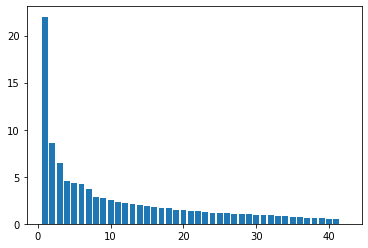

In [25]:
# plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
labels = ['PC' +  str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.show()

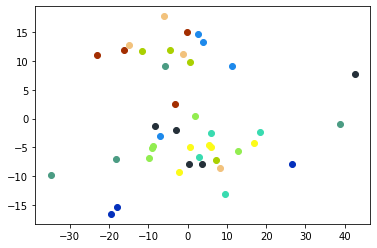

In [27]:
pca_df = pd.DataFrame(pca_data, columns=labels)

fig = plt.figure()
img_counter = 0
for n in num_img_list:
    r = lambda: random.randint(0,255)
    random_color = '#%02X%02X%02X' % (r(),r(),r())
    plt.plot(pca_df.PC1[img_counter:img_counter + n], pca_df.PC2[img_counter:img_counter + n], 'o',color=random_color)
    img_counter += n
plt.show()